In [ ]:
import sys
input = sys.stdin.readline

## 시도

#### 메모리 초과

In [5]:
# 표의 크기 n, 합을 구해야 하는 횟수 m
n, m = map(int, input().split())

# 표에 채워져 있는 수
array = [list(map(int, input().split())) for _ in range(n)]

# 각 케이스 실험 시작
for _ in range(m):
    x1, y1, x2, y2 = map(int, input().split())
    
    # 시작 좌표의 인덱스를 맞춰주기 위해 1씩 뺀 변수 생성
    row, column = x1 - 1, y1 - 1
    
    # 더해줄 값
    add_row, add_column = 0, 0
    
    # 행, 열 좌표를 저장할 리스트
    rows = []
    columns = []
    
    # 행 계산
    while row + add_row != x2: # 시작 + add_row가 목표 좌표까지 도달해야함
        if row + add_row > n: # 범위를 벗어나면 add_row를 초기화
            add_row = 0

        rows.append(row + add_row) # 목표 좌표에 도달하기 이전 값들은 rows에 더해줌
        add_row += 1 # add_row는 += 1
        
    # 열 계산
    while column + add_column != y2: # 시작 + add_column이 목표 좌표까지 도달해야함
        if column + add_column > n: # 범위를 벗어나면 add_column을 초기화
            add_column = 0
            
        columns.append(column + add_column) # 목표 좌표에 도달하기 이전 값들은 columns에 더해줌
        add_column += 1 # add_column은 += 1
        
    # 정답 계산
    result = 0

    for i in rows:
        for j in columns:
            result += array[i][j] # array의 좌표에 해당하는 값을 더해줌

    print(result)

4 3
1 2 3 4
2 3 4 5
3 4 5 6
4 5 6 7
2 2 3 4
27
3 4 3 4
6
1 1 4 4
64


## 정답

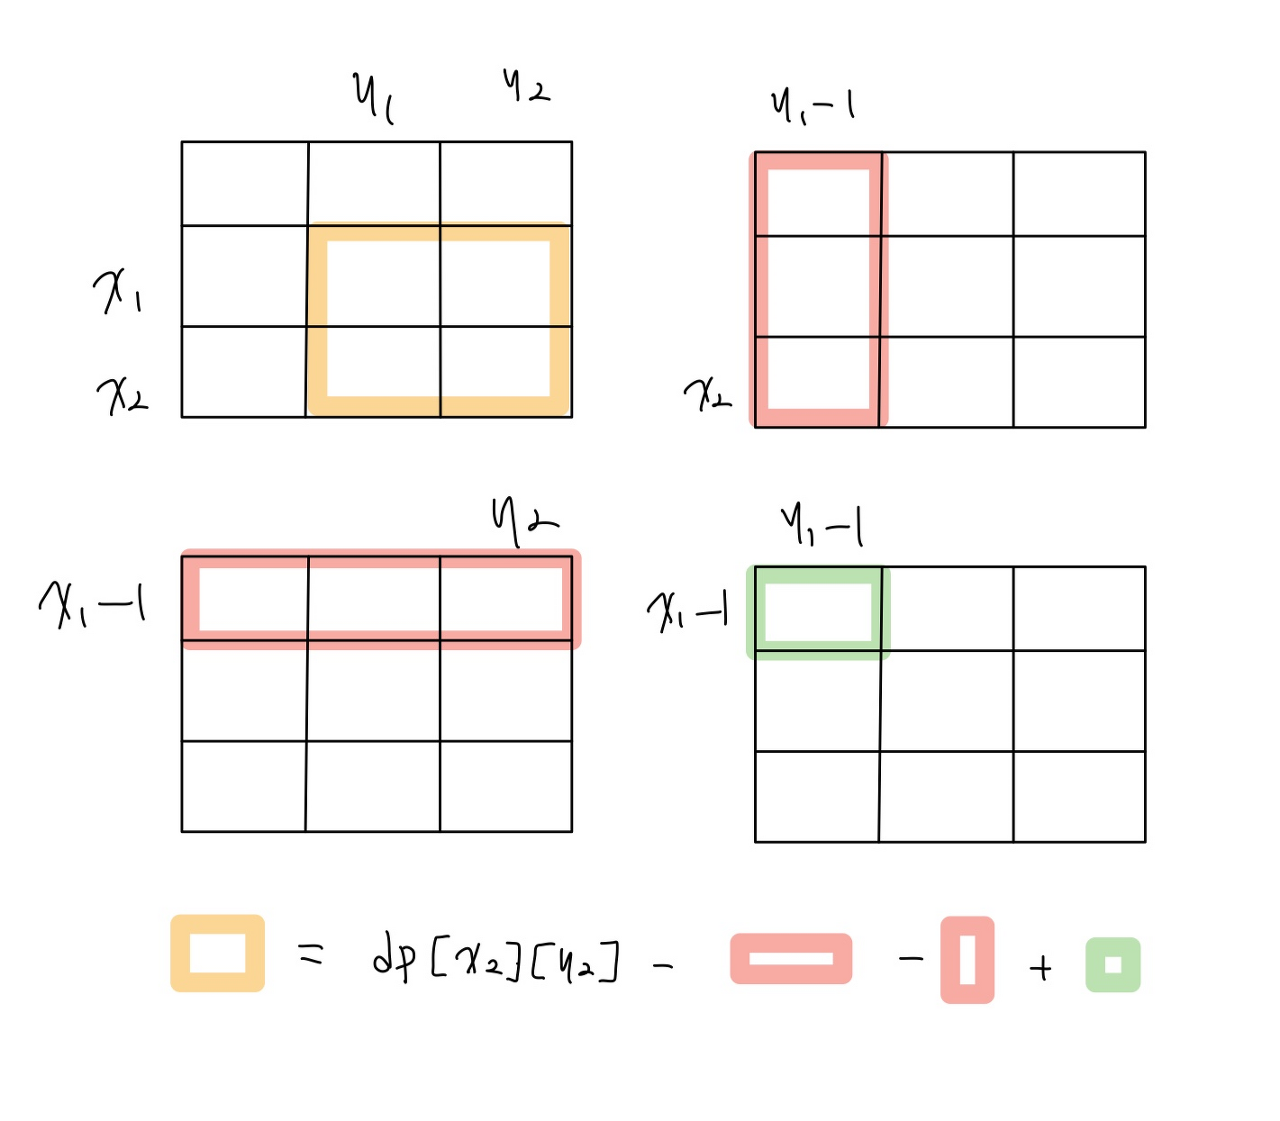

- 누적 합 (구간 합) 알고리즘이라고 한다.
- 노란 사각형 = 3x3사각형 - (1x3사각형 + 3x1사각형 - 1x1사각형)

In [ ]:
import sys
input = sys.stdin.readline

In [21]:
n, m = map(int, input().split())

graph = []
for _ in range(n):
    graph.append(list(map(int, input().split())))
    
dp = [[0] * (n + 1) for _ in range(n + 1)]

4 3
1 2 3 4
2 3 4 5
3 4 5 6
5 6 7 8


In [22]:
# DP로 왼쪽 위 모서리가 (1, 1)인 모든 직사각형의 합 구하기
# (1, 1) ~ (x, y)인 직사각형 = graph(x, y) + dp(x-1, y) + dp(x, y-1) - dp(x-1, y-1)
for i in range(1, n+1):
    for j in range(1, n+1):
        dp[i][j] = dp[i][j-1] + dp[i-1][j] - dp[i-1][j-1] + graph[i-1][j-1]

In [24]:
dp

[[0, 0, 0, 0, 0],
 [0, 1, 3, 6, 10],
 [0, 3, 8, 15, 24],
 [0, 6, 15, 27, 42],
 [0, 11, 26, 45, 68]]

In [20]:
for _ in range(m):
    x1, y1, x2, y2 = map(int, input().split())
    
    result = dp[x2][y2] - dp[x2][y1-1] -dp[x1-1][y2] + dp[x1-1][y1-1]
    print(result)

2 2 3 4
27
3 4 3 4
6
1 1 4 4
68
